In [1]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Georgia']})
rc('text', usetex=True)

In [2]:
from helper import *
from utils import *
from approximation import *
from plot import *

In [3]:
import os

In [23]:
def final_curve(contour_type, data_index=0):
    directory = '/Users/linggeli/monte_carlo/data/array/'
    dist = np.load(os.path.join(directory, 'dist_{}.npy'.format(contour_type)))
    stat = np.load(os.path.join(directory, 'stat_{}.npy'.format(contour_type)))
    return calculate_percentile_1d(dist, stat[data_index])

In [24]:
curve_NH = final_curve('dcp_NH', 15)
curve_IH = final_curve('dcp_IH', 15)

In [25]:
print(curve_IH)

[0.998999   0.99249625 0.97295944 0.94992489 0.932      0.9205
 0.943      0.966      0.98748122 0.997999   1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


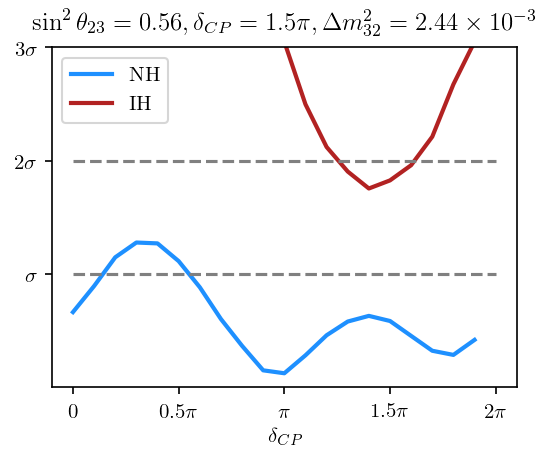

In [26]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(convert_to_sigma(curve_NH)[::-1], color='dodgerblue', lw=2, label='NH')
plt.plot(convert_to_sigma(curve_IH)[::-1], color='firebrick', lw=2, label='IH')
plt.plot([0, 20], [1, 1], '--', color='gray')
plt.plot([0, 20], [2, 2], '--', color='gray')
plt.ylim(0, 3)
plt.xlabel(r'$\delta_{CP}$')
plt.xticks([0, 5, 10, 15, 20], 
           [r'$0$', r'$0.5\pi$', r'$\pi$', r'$1.5\pi$', r'$2\pi$'])
plt.yticks([1, 2, 3], 
           [r'$\sigma$', r'$2\sigma$', r'$3\sigma$'])
plt.legend()
plt.title(r'$\sin^2{\theta_{23}}=0.56, \delta_{CP}=1.5\pi, \Delta m_{32}^2=2.44\times10^{-3}$')
plt.show()

In [28]:
curve_NH = final_curve('dmsq_32_NH', 15)
curve_IH = final_curve('dmsq_32_IH', 15)

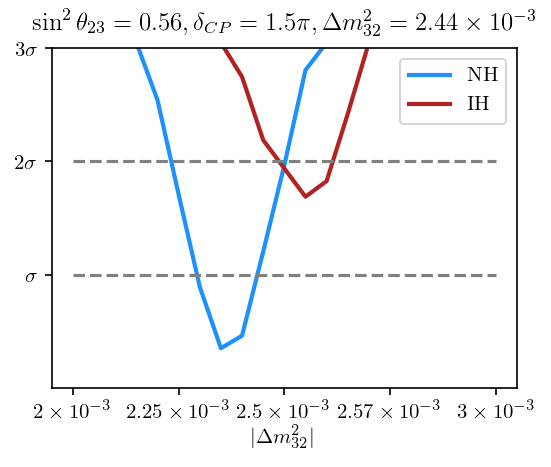

In [29]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(convert_to_sigma(curve_NH)[::-1], color='dodgerblue', lw=2, label='NH')
plt.plot(convert_to_sigma(curve_IH)[::-1], color='firebrick', lw=2, label='IH')
plt.plot([0, 20], [1, 1], '--', color='gray')
plt.plot([0, 20], [2, 2], '--', color='gray')
plt.ylim(0, 3)
plt.xlabel(r'$|\Delta m_{32}^2|$')
plt.xticks([0, 5, 10, 15, 20], 
           [r'$2\times10^{-3}$', r'$2.25\times10^{-3}$', r'$2.5\times10^{-3}$', 
            r'$2.57\times10^{-3}$', r'$3\times10^{-3}$'])
plt.yticks([1, 2, 3], 
           [r'$\sigma$', r'$2\sigma$', r'$3\sigma$'])
plt.legend()
plt.title(r'$\sin^2{\theta_{23}}=0.56, \delta_{CP}=1.5\pi, \Delta m_{32}^2=2.44\times10^{-3}$')
plt.show()

In [31]:
curve_NH = final_curve('theta23_NH', 15)
curve_IH = final_curve('theta23_IH', 15)

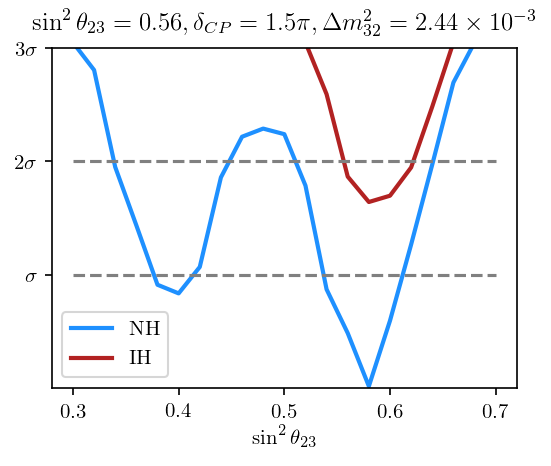

In [32]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(convert_to_sigma(curve_NH)[::-1], color='dodgerblue', lw=2, label='NH')
plt.plot(convert_to_sigma(curve_IH)[::-1], color='firebrick', lw=2, label='IH')
plt.plot([0, 20], [1, 1], '--', color='gray')
plt.plot([0, 20], [2, 2], '--', color='gray')
plt.ylim(0, 3)
plt.xlabel(r'$\sin^2{\theta_{23}}$')
plt.xticks([0, 5, 10, 15, 20], 
           [r'$0.3$', r'$0.4$', r'$0.5$', r'$0.6$', r'$0.7$'])
plt.yticks([1, 2, 3], 
           [r'$\sigma$', r'$2\sigma$', r'$3\sigma$'])
plt.legend()
plt.title(r'$\sin^2{\theta_{23}}=0.56, \delta_{CP}=1.5\pi, \Delta m_{32}^2=2.44\times10^{-3}$')
plt.show()

In [33]:
directory = '/Users/linggeli/monte_carlo/data/array/'
contour_type = 'dcp_IH'
data_index = 15
contour_dist = np.load(os.path.join(directory, 'dist_{}.npy'.format(contour_type)))
contour_stat = np.load(os.path.join(directory, 'stat_{}.npy'.format(contour_type)))[data_index]

In [34]:
contour_tile = calculate_percentile_1d(contour_dist, contour_stat)

In [35]:
all_points = np.linspace(0, 1, 20).reshape((20, 1))
all_samples = contour_dist
all_obs = contour_stat

In [36]:
n_mc = 0
total = 20 * 2000
priority = np.random.uniform(size=20)  # uniform priority means random sampling
sample_size = np.zeros(20)

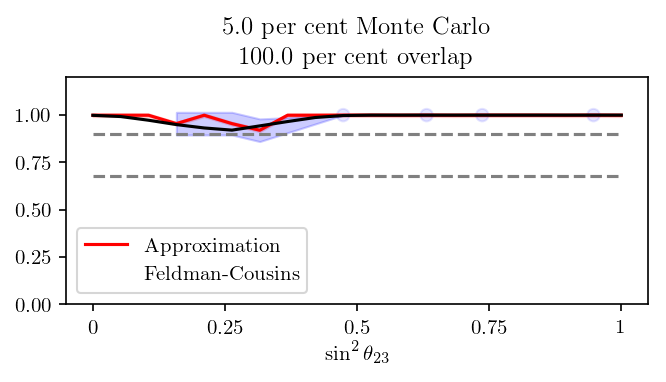

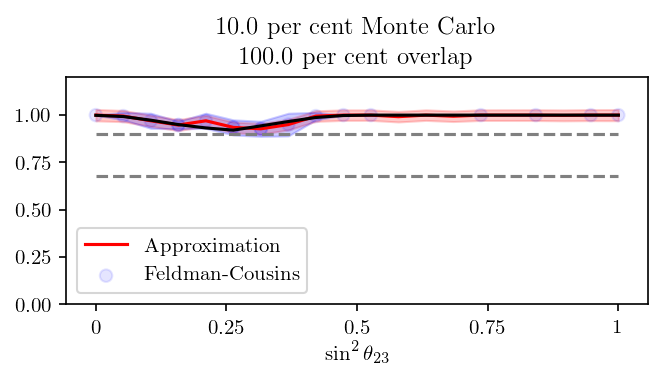

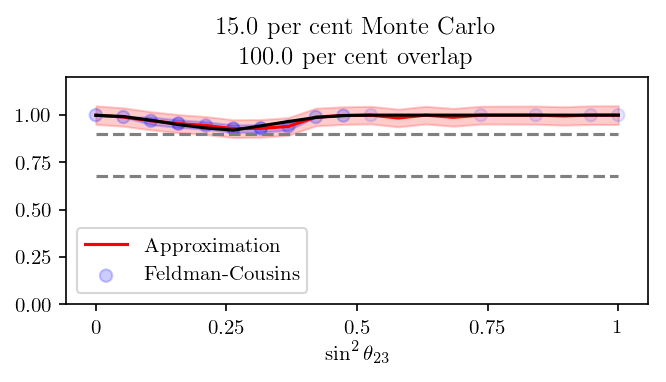

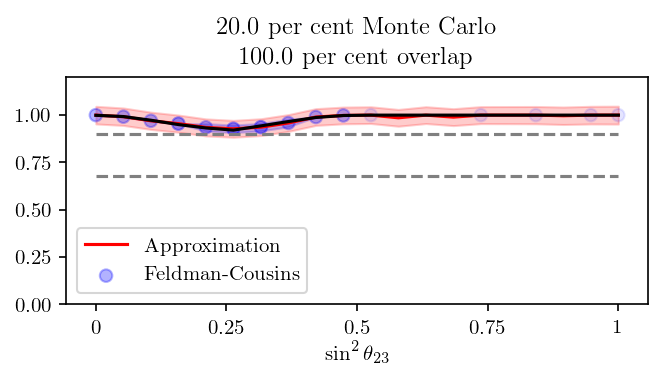

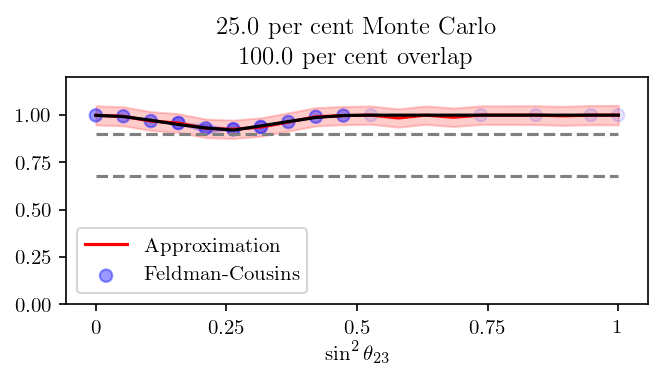

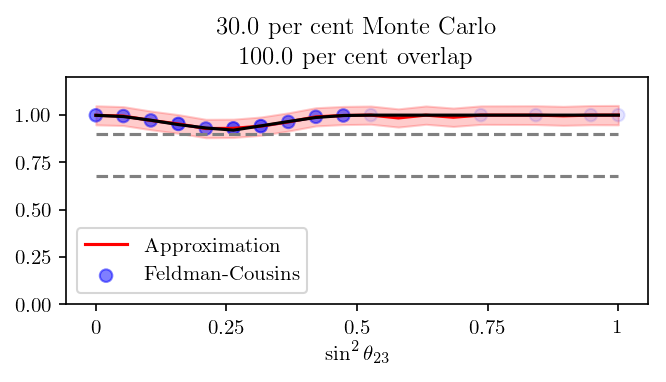

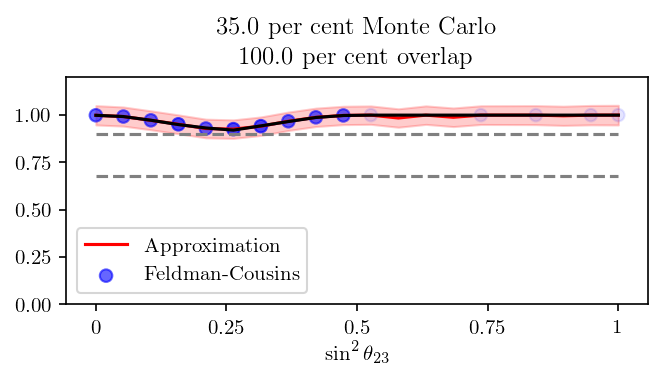

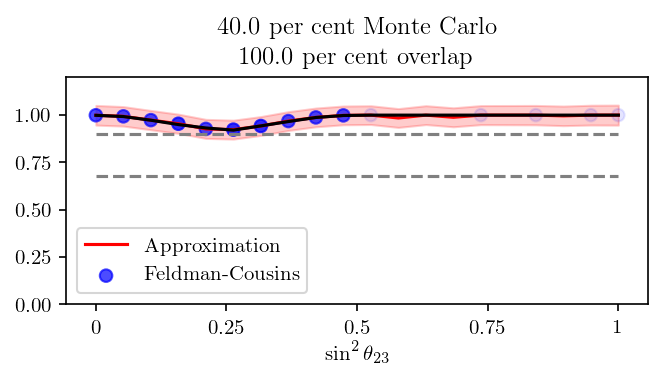

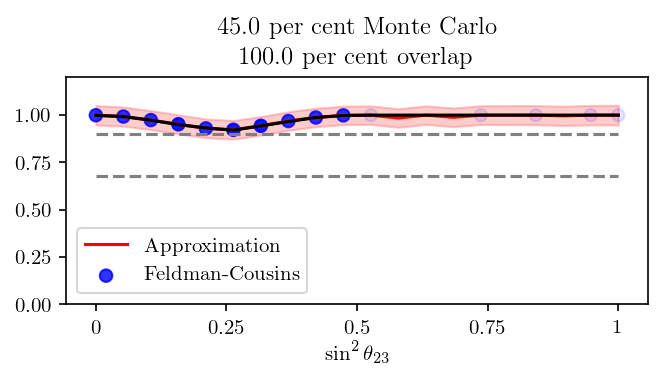

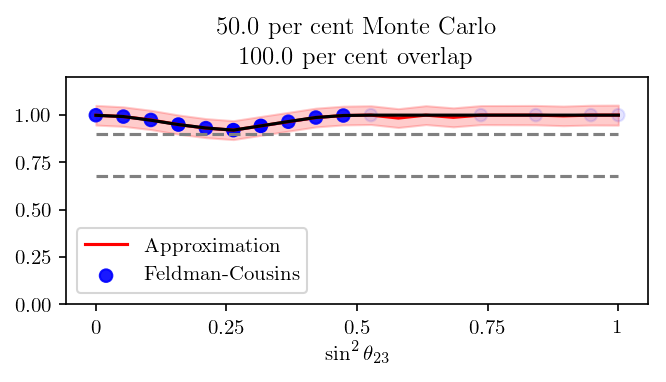

In [37]:
for run in range(10):
    n_mc += 10 * 200
    
    sample_size = expand_sample(priority, sample_size, 10, 200, 2000)
    current_points = get_current_training(all_points, sample_size)
    current_target, current_error = get_current_target(all_samples, all_obs, sample_size)
    hat, std = build_approximation(current_points, current_target, current_error, all_points)
    priority = acquisition_function(hat, std)
    
    hat[sample_size > 0] = current_target  # replace model approximation with sample estimate when possible
    
    overlap = calculate_overlap(hat, contour_tile)

    fig, ax = plt.subplots(figsize=(5, 2), dpi=150)

    plt.plot(all_points, hat, c='red', label='Approximation')
    ax.fill_between(all_points[:, 0], hat - 2 * std, hat + 2 * std, alpha=0.2, color='red')
    
    rgba_colors = np.zeros((20, 4))
    rgba_colors[:, 2] = 1
    rgba_colors[:, 3] = sample_size * 1.0 / 2000
    plt.scatter(current_points, current_target, color=rgba_colors, label='Feldman-Cousins')
    
    w = (current_error[:, 1] - current_error[:, 0]) * 2
    ax.fill_between(current_points[:, 0], current_target - w, current_target + w, alpha=0.2, color='blue')

    plt.plot([0, 1], [0.90, 0.90], '--', color='gray')
    plt.plot([0, 1], [0.68, 0.68], '--', color='gray')

    plt.plot(all_points, contour_tile, c='black')

    plt.ylim(0, 1.2)
    plt.xlabel(r'$\sin^2{\theta_{23}}$')
    plt.xticks([0, 0.25, 0.5, 0.75, 1], 
               [r'$0$', r'$0.25$', r'$0.5$', r'$0.75$', r'$1$'])
    plt.title('{} per cent Monte Carlo\n'.format(n_mc * 100.0 / total) + 
              '{} per cent overlap'.format(np.round(overlap * 100, 3)))
    plt.legend()
    #plt.savefig('final{}.png'.format(run), dpi=200)
    plt.show()